## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [18]:
train[0].shape

(50000, 32, 32, 3)

In [21]:
x_train.shape[-1]

3072

In [26]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256,activation='relu')(input_layer)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    x = keras.layers.Dense(units=64, activation='relu')(x)
    output = keras.layers.Dense(units=10, activation='softmax')(x)
    model = keras.models.Model(inputs= input_layer, outputs = output)
    
    return model
model = build_mlp()

In [29]:
"""
Compile 模型
"""
model.compile(optimizer= keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])

W0714 14:47:18.848415 27588 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [31]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0714 14:47:37.806096 27588 deprecation.py:323] From C:\Users\user1\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 14:47:37.870095 27588 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.9580 - acc: 0.2810 - val_loss: 1.7993 - val_acc: 0.3505
Epoch 2/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.7334 - acc: 0.3799 - val_loss: 1.6852 - val_acc: 0.3995
Epoch 3/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.6564 - acc: 0.4086 - val_loss: 1.6277 - val_acc: 0.4208
Epoch 4/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.5902 - acc: 0.4315 - val_loss: 1.5838 - val_acc: 0.4343
Epoch 5/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.5402 - acc: 0.4524 - val_loss: 1.5861 - val_acc: 0.4304
Epoch 6/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.5068 - acc: 0.4642 - val_loss: 1.5211 - val_acc: 0.4585
Epoch 7/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4748 - acc: 0.4748 - val_loss: 1.5043

50000/50000 [==============================] - 5s 99us/step - loss: 0.9201 - acc: 0.6727 - val_loss: 1.5129 - val_acc: 0.5162
Epoch 60/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.9212 - acc: 0.6713 - val_loss: 1.5168 - val_acc: 0.5166
Epoch 61/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.9061 - acc: 0.6754 - val_loss: 1.5261 - val_acc: 0.5123
Epoch 62/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.9056 - acc: 0.6746 - val_loss: 1.5333 - val_acc: 0.5149
Epoch 63/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.9024 - acc: 0.6782 - val_loss: 1.5450 - val_acc: 0.5153
Epoch 64/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.8951 - acc: 0.6792 - val_loss: 1.5412 - val_acc: 0.5187
Epoch 65/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.9001 - acc: 0.6780 - val_loss: 1.5657 - val_acc: 0.5136
Epoch 66/500
50000/50000 [==============

50000/50000 [==============================] - 5s 98us/step - loss: 0.6781 - acc: 0.7565 - val_loss: 1.9487 - val_acc: 0.4942
Epoch 118/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.6847 - acc: 0.7530 - val_loss: 1.9929 - val_acc: 0.4970
Epoch 119/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.6695 - acc: 0.7592 - val_loss: 1.9507 - val_acc: 0.4953
Epoch 120/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.6590 - acc: 0.7626 - val_loss: 1.9546 - val_acc: 0.4910
Epoch 121/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.6594 - acc: 0.7630 - val_loss: 2.0379 - val_acc: 0.4883
Epoch 122/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.6655 - acc: 0.7611 - val_loss: 2.0407 - val_acc: 0.4830
Epoch 123/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.6529 - acc: 0.7652 - val_loss: 1.9823 - val_acc: 0.4923
Epoch 124/500
50000/50000 [======

50000/50000 [==============================] - 5s 98us/step - loss: 0.5192 - acc: 0.8128 - val_loss: 2.4627 - val_acc: 0.4764
Epoch 176/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.5329 - acc: 0.8072 - val_loss: 2.4091 - val_acc: 0.4848
Epoch 177/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.5203 - acc: 0.8125 - val_loss: 2.5033 - val_acc: 0.4853
Epoch 178/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.5144 - acc: 0.8155 - val_loss: 2.5358 - val_acc: 0.4768
Epoch 179/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.5260 - acc: 0.8120 - val_loss: 2.4223 - val_acc: 0.4811
Epoch 180/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.5147 - acc: 0.8136 - val_loss: 2.4877 - val_acc: 0.4890
Epoch 181/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.5104 - acc: 0.8151 - val_loss: 2.4875 - val_acc: 0.4805
Epoch 182/500
50000/50000 [======

50000/50000 [==============================] - 5s 96us/step - loss: 0.4192 - acc: 0.8484 - val_loss: 2.8868 - val_acc: 0.4676
Epoch 234/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.4410 - acc: 0.8389 - val_loss: 2.8280 - val_acc: 0.4760
Epoch 235/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.4483 - acc: 0.8380 - val_loss: 2.8470 - val_acc: 0.4795
Epoch 236/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.4024 - acc: 0.8551 - val_loss: 2.9208 - val_acc: 0.4761
Epoch 237/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.4317 - acc: 0.8426 - val_loss: 2.9827 - val_acc: 0.4707
Epoch 238/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.4405 - acc: 0.8417 - val_loss: 3.0050 - val_acc: 0.4712
Epoch 239/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.4209 - acc: 0.8502 - val_loss: 2.9041 - val_acc: 0.4769
Epoch 240/500
50000/50000 [======

50000/50000 [==============================] - 5s 97us/step - loss: 0.3550 - acc: 0.8721 - val_loss: 3.3056 - val_acc: 0.4712
Epoch 292/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.4002 - acc: 0.8531 - val_loss: 3.3003 - val_acc: 0.4749
Epoch 293/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.3418 - acc: 0.8765 - val_loss: 3.2826 - val_acc: 0.4695
Epoch 294/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.3512 - acc: 0.8736 - val_loss: 3.3092 - val_acc: 0.4719
Epoch 295/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.3490 - acc: 0.8741 - val_loss: 3.3402 - val_acc: 0.4721
Epoch 296/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.3413 - acc: 0.8774 - val_loss: 3.3722 - val_acc: 0.4641
Epoch 297/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.3796 - acc: 0.8627 - val_loss: 3.3187 - val_acc: 0.4630
Epoch 298/500
50000/50000 [======

50000/50000 [==============================] - 5s 98us/step - loss: 0.3074 - acc: 0.8889 - val_loss: 3.6302 - val_acc: 0.4663
Epoch 350/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.3175 - acc: 0.8850 - val_loss: 3.7016 - val_acc: 0.4680
Epoch 351/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.3035 - acc: 0.8916 - val_loss: 3.5905 - val_acc: 0.4676
Epoch 352/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.3402 - acc: 0.8759 - val_loss: 3.7446 - val_acc: 0.4636
Epoch 353/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.3168 - acc: 0.8871 - val_loss: 3.5728 - val_acc: 0.4672
Epoch 354/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2972 - acc: 0.8923 - val_loss: 3.7790 - val_acc: 0.4590
Epoch 355/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.3519 - acc: 0.8731 - val_loss: 3.6081 - val_acc: 0.4664
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 5s 97us/step - loss: 0.2964 - acc: 0.8945 - val_loss: 3.9423 - val_acc: 0.4609
Epoch 408/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2644 - acc: 0.9041 - val_loss: 3.9024 - val_acc: 0.4625
Epoch 409/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2661 - acc: 0.9034 - val_loss: 3.9366 - val_acc: 0.4627
Epoch 410/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2614 - acc: 0.9054 - val_loss: 3.9194 - val_acc: 0.4644
Epoch 411/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2839 - acc: 0.8976 - val_loss: 3.9496 - val_acc: 0.4633
Epoch 412/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2715 - acc: 0.9017 - val_loss: 3.9120 - val_acc: 0.4609
Epoch 413/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2588 - acc: 0.9074 - val_loss: 3.9857 - val_acc: 0.4614
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 5s 98us/step - loss: 0.2879 - acc: 0.8960 - val_loss: 4.2082 - val_acc: 0.4622
Epoch 466/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2406 - acc: 0.9131 - val_loss: 4.1768 - val_acc: 0.4628
Epoch 467/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.2262 - acc: 0.9201 - val_loss: 4.2815 - val_acc: 0.4561
Epoch 468/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.2482 - acc: 0.9129 - val_loss: 4.1824 - val_acc: 0.4643
Epoch 469/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.3119 - acc: 0.8896 - val_loss: 4.1700 - val_acc: 0.4624
Epoch 470/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.2546 - acc: 0.9084 - val_loss: 4.2430 - val_acc: 0.4609
Epoch 471/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2552 - acc: 0.9096 - val_loss: 4.1608 - val_acc: 0.4594
Epoch 472/500
50000/50000 [===

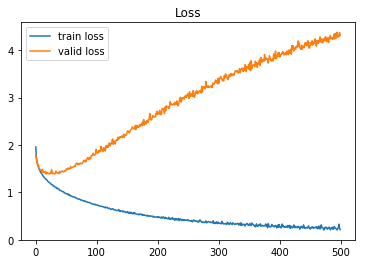

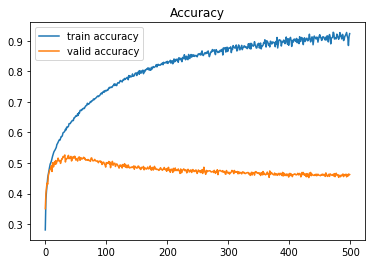

In [33]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Optimizer 換成 SGD

In [34]:
model.compile(optimizer= keras.optimizers.SGD(), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [35]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.1094 - acc: 0.9686 - val_loss: 4.2984 - val_acc: 0.4639
Epoch 2/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.1012 - acc: 0.9716 - val_loss: 4.3415 - val_acc: 0.4636
Epoch 3/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0986 - acc: 0.9722 - val_loss: 4.3498 - val_acc: 0.4621
Epoch 4/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0969 - acc: 0.9732 - val_loss: 4.3756 - val_acc: 0.4634
Epoch 5/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0956 - acc: 0.9732 - val_loss: 4.3895 - val_acc: 0.4625
Epoch 6/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0942 - acc: 0.9741 - val_loss: 4.4053 - val_acc: 0.4624
Epoch 7/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0932 - acc: 0.9744 - val_loss: 4.4149 - 

50000/50000 [==============================] - 4s 77us/step - loss: 0.0699 - acc: 0.9824 - val_loss: 4.8506 - val_acc: 0.4609
Epoch 60/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0699 - acc: 0.9823 - val_loss: 4.8360 - val_acc: 0.4613
Epoch 61/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0694 - acc: 0.9823 - val_loss: 4.8363 - val_acc: 0.4632
Epoch 62/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0693 - acc: 0.9826 - val_loss: 4.8520 - val_acc: 0.4600
Epoch 63/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0691 - acc: 0.9824 - val_loss: 4.8607 - val_acc: 0.4624
Epoch 64/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0688 - acc: 0.9827 - val_loss: 4.8761 - val_acc: 0.4600
Epoch 65/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0685 - acc: 0.9829 - val_loss: 4.8656 - val_acc: 0.4617
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0578 - acc: 0.9862 - val_loss: 5.1139 - val_acc: 0.4607
Epoch 119/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0575 - acc: 0.9865 - val_loss: 5.1261 - val_acc: 0.4597
Epoch 120/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0576 - acc: 0.9862 - val_loss: 5.1276 - val_acc: 0.4592
Epoch 121/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0570 - acc: 0.9869 - val_loss: 5.1275 - val_acc: 0.4607
Epoch 122/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0571 - acc: 0.9869 - val_loss: 5.1413 - val_acc: 0.4602
Epoch 123/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0569 - acc: 0.9868 - val_loss: 5.1440 - val_acc: 0.4587
Epoch 124/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0568 - acc: 0.9865 - val_loss: 5.1576 - val_acc: 0.4609
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 78us/step - loss: 0.0492 - acc: 0.9887 - val_loss: 5.3384 - val_acc: 0.4575
Epoch 177/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0492 - acc: 0.9888 - val_loss: 5.3297 - val_acc: 0.4580
Epoch 178/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0490 - acc: 0.9893 - val_loss: 5.3391 - val_acc: 0.4593
Epoch 179/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0488 - acc: 0.9893 - val_loss: 5.3512 - val_acc: 0.4588
Epoch 180/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0488 - acc: 0.9893 - val_loss: 5.3528 - val_acc: 0.4586
Epoch 181/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0486 - acc: 0.9894 - val_loss: 5.3652 - val_acc: 0.4579
Epoch 182/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0484 - acc: 0.9895 - val_loss: 5.3643 - val_acc: 0.4588
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 4s 77us/step - loss: 0.0427 - acc: 0.9911 - val_loss: 5.5262 - val_acc: 0.4579
Epoch 235/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0424 - acc: 0.9913 - val_loss: 5.5297 - val_acc: 0.4588
Epoch 236/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0423 - acc: 0.9910 - val_loss: 5.5397 - val_acc: 0.4592
Epoch 237/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0424 - acc: 0.9913 - val_loss: 5.5327 - val_acc: 0.4579
Epoch 238/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0420 - acc: 0.9912 - val_loss: 5.5279 - val_acc: 0.4582
Epoch 239/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0420 - acc: 0.9912 - val_loss: 5.5379 - val_acc: 0.4592
Epoch 240/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.0420 - acc: 0.9912 - val_loss: 5.5297 - val_acc: 0.4568
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 82us/step - loss: 0.0369 - acc: 0.9926 - val_loss: 5.6697 - val_acc: 0.4576
Epoch 293/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0368 - acc: 0.9928 - val_loss: 5.6802 - val_acc: 0.4578
Epoch 294/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0367 - acc: 0.9929 - val_loss: 5.6760 - val_acc: 0.4570
Epoch 295/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0366 - acc: 0.9929 - val_loss: 5.6826 - val_acc: 0.4567
Epoch 296/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0366 - acc: 0.9928 - val_loss: 5.6742 - val_acc: 0.4583
Epoch 297/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0365 - acc: 0.9926 - val_loss: 5.6820 - val_acc: 0.4563
Epoch 298/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.0363 - acc: 0.9928 - val_loss: 5.6878 - val_acc: 0.4581
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 4s 79us/step - loss: 0.0323 - acc: 0.9940 - val_loss: 5.8123 - val_acc: 0.4571
Epoch 351/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0321 - acc: 0.9942 - val_loss: 5.8079 - val_acc: 0.4577
Epoch 352/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0320 - acc: 0.9940 - val_loss: 5.8192 - val_acc: 0.4554
Epoch 353/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0321 - acc: 0.9938 - val_loss: 5.8150 - val_acc: 0.4564
Epoch 354/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0320 - acc: 0.9941 - val_loss: 5.8249 - val_acc: 0.4562
Epoch 355/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0318 - acc: 0.9941 - val_loss: 5.8236 - val_acc: 0.4565
Epoch 356/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0318 - acc: 0.9942 - val_loss: 5.8152 - val_acc: 0.4576
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 78us/step - loss: 0.0283 - acc: 0.9953 - val_loss: 5.9308 - val_acc: 0.4577
Epoch 409/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0282 - acc: 0.9953 - val_loss: 5.9264 - val_acc: 0.4561
Epoch 410/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0283 - acc: 0.9951 - val_loss: 5.9316 - val_acc: 0.4565
Epoch 411/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0281 - acc: 0.9952 - val_loss: 5.9377 - val_acc: 0.4583
Epoch 412/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0281 - acc: 0.9952 - val_loss: 5.9291 - val_acc: 0.4566
Epoch 413/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0279 - acc: 0.9953 - val_loss: 5.9398 - val_acc: 0.4560
Epoch 414/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0280 - acc: 0.9952 - val_loss: 5.9448 - val_acc: 0.4579
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 4s 79us/step - loss: 0.0249 - acc: 0.9960 - val_loss: 6.0313 - val_acc: 0.4563
Epoch 467/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0249 - acc: 0.9959 - val_loss: 6.0430 - val_acc: 0.4566
Epoch 468/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0248 - acc: 0.9960 - val_loss: 6.0410 - val_acc: 0.4557
Epoch 469/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0247 - acc: 0.9960 - val_loss: 6.0431 - val_acc: 0.4557
Epoch 470/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.0247 - acc: 0.9961 - val_loss: 6.0438 - val_acc: 0.4554
Epoch 471/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0247 - acc: 0.9960 - val_loss: 6.0383 - val_acc: 0.4566
Epoch 472/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0245 - acc: 0.9961 - val_loss: 6.0492 - val_acc: 0.4555
Epoch 473/500
50000/50000 [=======

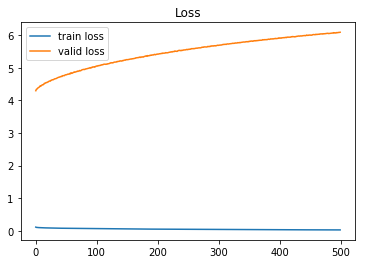

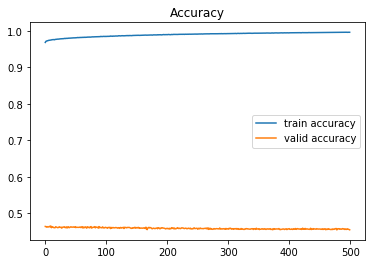

In [36]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()